## Gaussian Process Regression

This notebook shows the implementation of gaussian process regression model and deriving mean absolute error for the data set Advertising taken from http://www-bcf.usc.edu/~gareth/ISL/data.html


In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:21: UserWarning: The installed version of numexpr 1.4.2 is not supported in pandas and will be not be used
The minimum supported version is 2.1

  "version is 2.1\n".format(ver=ver), UserWarning)


In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)

In [3]:
feature_col=['TV','Radio','Newspaper']
X=data[feature_col]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [4]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [5]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [6]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


In [7]:
gp = GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                     random_start=100)
gp.fit(X_train, y_train)

GaussianProcess(beta0=None, corr=<function squared_exponential at 0x2a78cf8>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x1f2ef90>,
        regr=<function constant at 0x2a78938>, storage_mode='full',
        theta0=array([[ 0.01]]), thetaL=array([[ 0.0001]]),
        thetaU=array([[ 0.1]]), verbose=False)

In [8]:
y_pred, MSE = gp.predict(X_test, eval_MSE=True)
sigma = np.sqrt(MSE)

In [9]:
from sklearn import metrics
MAD= metrics.mean_absolute_error(y_test,y_pred)
print MAD

0.420102980389


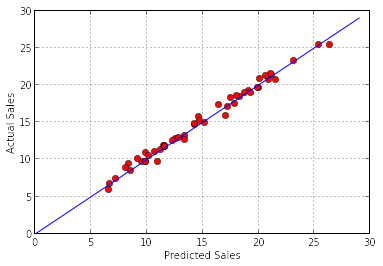

In [10]:
fig = pl.figure()
axes=fig.add_subplot(111)
a=np.arange(30)
axes.plot(y_pred, y_test, color='red',linestyle='',marker='o')
axes.plot(a,a, color='b',linestyle='-')
axes.set_xlabel('Predicted Sales')
axes.set_ylabel('Actual Sales')
axes.grid()
#pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
#pl.plot(x, y_pred, 'b-', label=u'Prediction')
#pl.fill(np.concatenate([x, x[::-1]]),
 #  np.concatenate([y_pred - 1.9600 * sigma,
#                   (y_pred + 1.9600 * sigma)[::-1]]),
 #       alpha=.5, fc='b', ec='None', label='95% confidence interval')
#pl.legend(loc='upper left')
pl.show()

In [11]:
w=np.ravel(y_test)
w

array([ 19.2,  18.3,  20.7,  21.4,  23.2,  20.8,  25.4,  15.9,  11. ,
        10.9,  14.6,  12.8,  20.7,  18.4,  15.7,  15.2,  11.7,  17.1,
         7.3,   6.7,  19.6,   9.6,  21.5,   9.7,  18.9,  21.2,  11.8,
        14.8,  12.9,   9.7,  18.5,  14.9,  12.5,  17.4,  25.4,   5.9,
        11.8,   9.4,   8.4,  11.3,  19.6,  10.5,  11.7,  17.3,  13.2,
        12.6,   9.7,  10.1,  18.9,   8.8])

In [12]:
x=np.arange(1,51)
pf=pd.DataFrame(x,columns=['x'])
pf['y_predicted']=y_pred
pf['y_actual']=w

In [ ]:
import seaborn as sns
def draw_vertical_line(sns,y1,y2,x):
    dif=0.1
    if y1>y2:
        draw_vertical_line(sns,y2,y1,x)
    while y1<y2:
        sns.plt.plot([x],[y1],'r*')
        y1 = y1 + dif

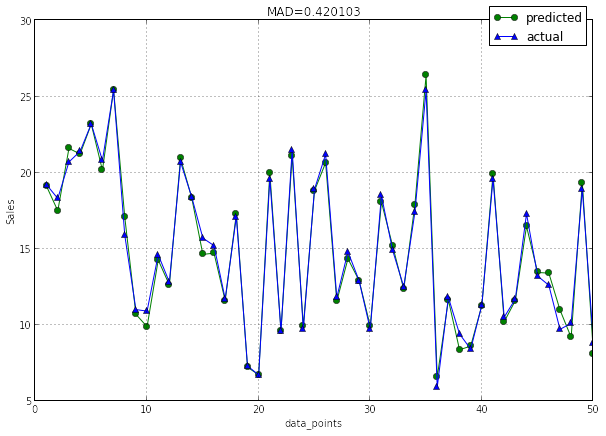

In [13]:
fig2=plt.figure(figsize=(10,15))
axes=fig2.add_subplot(211)
axes.plot(pf['x'],pf['y_predicted'],'go',linestyle='-',label='predicted')
axes.plot(pf['x'],pf['y_actual'],'b^',linestyle='-',label='actual')
axes.set_xlabel('data_points')
axes.set_ylabel('Sales')
axes.set_title("MAD=%f" %(MAD))
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()